In [40]:
from IPython.core.interactiveshell import InteractiveShell
from pprint import pprint
import pandas as pd
import numpy as np
import warnings
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns


warnings.filterwarnings("ignore")
InteractiveShell.ast_node_interactivity = "all"

%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 0 ns (started: 2023-05-22 03:38:25 +07:00)


In [41]:
train_ds = pd.read_csv("./train_ds_small_process.csv")
test_ds = pd.read_csv("./test_ds_small_process.csv")

time: 31 ms (started: 2023-05-22 03:38:25 +07:00)


In [42]:
X_train = train_ds.drop(["Giá tiền (VNĐ)"], axis=1)
y_train = train_ds["Giá tiền (VNĐ)"]
X_test = test_ds.drop("Giá tiền (VNĐ)", axis=1)
y_test = test_ds["Giá tiền (VNĐ)"]


time: 0 ns (started: 2023-05-22 03:38:25 +07:00)


In [43]:
from sklearn import metrics


time: 0 ns (started: 2023-05-22 03:38:25 +07:00)


In [44]:
def metric_for_evalue_model(y_test, y_pred):
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"MAE = {mae}")
    print(f"MSE = {mse}")
    print(f"R2 = {r2}")
    print(f"RMSE = {rmse}")

time: 0 ns (started: 2023-05-22 03:38:25 +07:00)


In [45]:
def plot_residuals(y_test, y_pred):
    indexes = list(range(1, 150+1))[:150]
    fig, axs = plt.subplots(1, 1, figsize=(20, 6), sharey=True)
    axs.plot(indexes, y_pred[:150], label='predicted_value', color='purple')
    axs.plot(indexes, y_test[:150], label='actual_value', color='orange')
    axs.legend()
    axs.set_ylabel('Price')
    fig.suptitle('Predicted Price VS Actual Price')
    plt.show()

time: 16 ms (started: 2023-05-22 03:38:25 +07:00)


Random Forest Regressor


In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

rf = RandomForestRegressor()

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

metric_for_evalue_model(y_test, y_pred)

RandomForestRegressor()

MAE = 5714890.243095057
MSE = 134940828768279.5
R2 = 0.2233134456447583
RMSE = 11616403.435154941
time: 250 ms (started: 2023-05-22 03:38:25 +07:00)


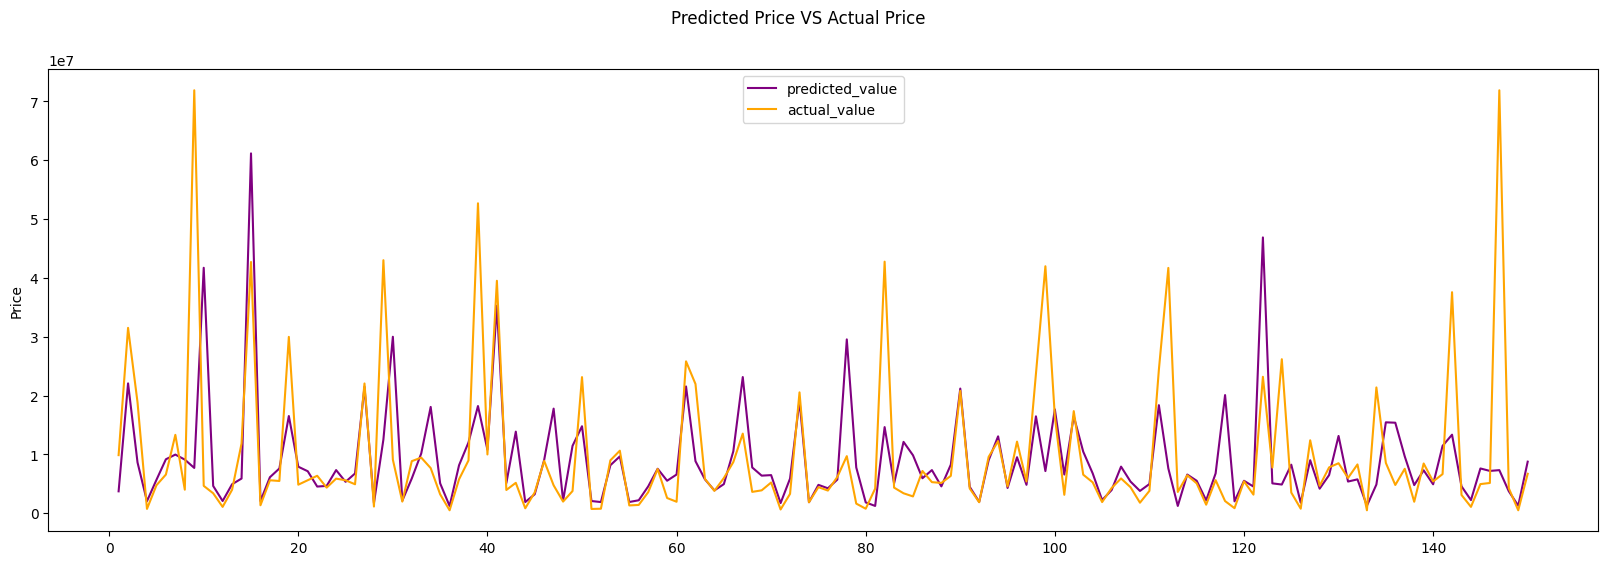

time: 203 ms (started: 2023-05-22 03:38:26 +07:00)


In [47]:
plot_residuals(y_test, y_pred)

In [48]:
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_pars = grid_search.best_params_

print('Best hyperparameters: ', best_pars)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

Best hyperparameters:  {'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5}
time: 45.3 s (started: 2023-05-22 03:38:26 +07:00)


RandomForestRegressor(max_depth=9, max_features='auto', min_samples_leaf=2,
                      min_samples_split=5, random_state=0)

MAE = 5585256.5215453375
MSE = 132916906390796.66
R2 = 0.23496265005530015
RMSE = 11528959.466959568


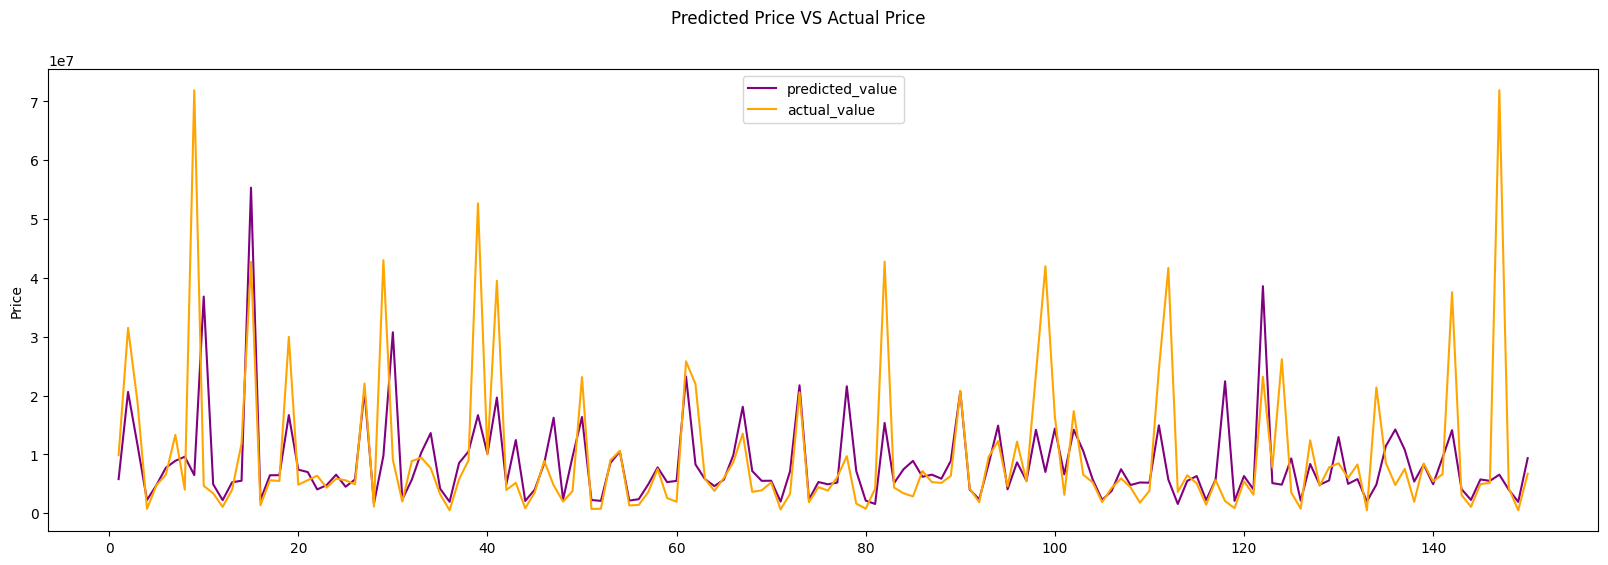

time: 375 ms (started: 2023-05-22 03:39:11 +07:00)


In [49]:
rf = RandomForestRegressor(random_state=0, max_depth=best_pars['max_depth'], min_samples_split=best_pars[
                           'min_samples_split'], min_samples_leaf=best_pars['min_samples_leaf'], max_features=best_pars['max_features'])

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

metric_for_evalue_model(y_test, y_pred)

plot_residuals(y_test, y_pred)

Logistic Regression

LogisticRegression()

MAE = 6274551.0
MSE = 183277681313325.0
R2 = -0.05490170831770125
RMSE = 13538008.76470853


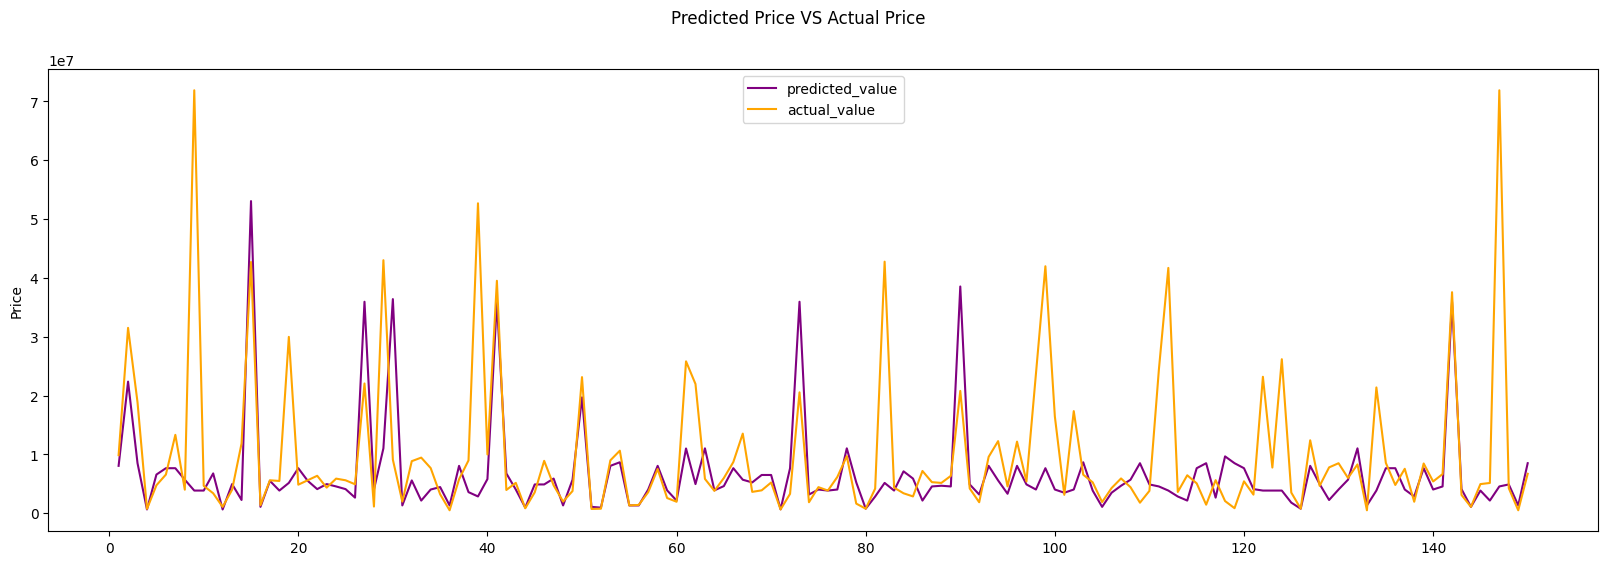

time: 1.01 s (started: 2023-05-22 03:39:12 +07:00)


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic = LogisticRegression()

logistic.fit(X_train, y_train)

y_pred = logistic.predict(X_test)

metric_for_evalue_model(y_test, y_pred)

plot_residuals(y_test, y_pred)

In [51]:
params = {"penalty": ["l1", "l2", "none"], "C": [0.01, 0.1, 1, 10, 100]}

clf = GridSearchCV(logistic, params)
clf.fit(X_train, y_train)

# clf.best_params_

c = 0.01
penalty = 'none'

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'none']})

time: 33.4 s (started: 2023-05-22 03:39:13 +07:00)


LogisticRegression(C=0.01, penalty='none')

MAE = 5337642.5
MSE = 133669932006650.0
R2 = 0.23062841796070788
RMSE = 11561571.346778516


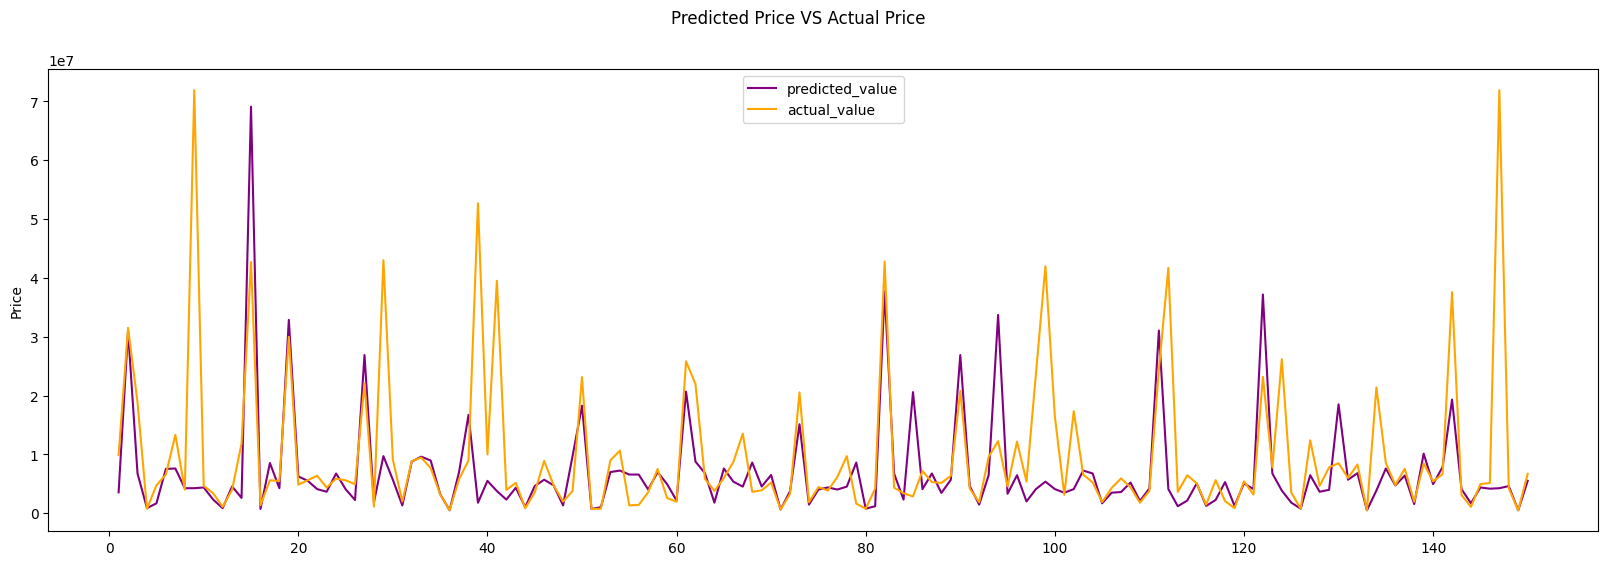

time: 1.19 s (started: 2023-05-22 03:39:46 +07:00)


In [52]:
logistic = LogisticRegression(penalty='none',C=0.01)
logistic.fit(X_train,y_train)
y_pred = logistic.predict(X_test)

metric_for_evalue_model(y_test, y_pred)

plot_residuals(y_test, y_pred)